# 주제 : 우리는 코로나에 잘 대응하고 있는걸까?

---

전 세계에 코로나 바이러스가 퍼진지 2년 가까운 시간이 지났습니다.<br>
지금까지 각국의 정부가 효과적으로 대응한 것인지는 보건 전문가만이 올바르게 판단할 수 있겠지만,<br>
데이터 사이언스를 공부하는 사람으로서 현재까지 나온 통계 자료를 바탕으로<br>
어떤 지표가 나타나는지 관찰해보려 합니다.<br>
이 프로젝트는 방역당국의 성과나 잘잘못을 판단하려는 목적으로 진행된 것이 아님을 미리 밝힙니다.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1-1. 데이터 불러오기

- 데이터 출처 : https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook

In [3]:
# 확진자
df_infectee = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# 사망자
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# 회복자
df_recover = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
df_infectee.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789


In [5]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7221,7221,7221,7225,7228,7230,7234,7238,7238,7238
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2746,2753,2759,2768,2777,2783,2788,2797,2807,2810
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5843,5846,5850,5853,5855,5859,5862,5864,5867,5870
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1603,1613,1618,1622,1629,1642,1650,1653,1660,1662


In [6]:
df_recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## 1-2. 데이터 추출하기

- 우리나라를 포함한 선진국 4개국 데이터 추출하기
- 우리나라의 2021년 1인당 GDP($35,200)와 비슷한 경제력을 가진 국가를 기준으로 4개국을 선정 : 이탈리아, 일본, 이스라엘, 독일
- 참고자료 : https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD

In [7]:
len(df_infectee["Country/Region"].unique())

195

In [8]:
df_infectee["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
country_list = ['Korea, South', 'Italy', 'Japan', 'Israel', 'Germany']

In [10]:
country_selected1 = (df_infectee['Country/Region'] == 'Korea, South') |\
                    (df_infectee['Country/Region'] == 'Italy') |\
                    (df_infectee['Country/Region'] == 'Japan') |\
                    (df_infectee['Country/Region'] == 'Israel') |\
                    (df_infectee['Country/Region'] == 'Germany')

In [11]:
df_infectee = df_infectee[country_selected1].copy()
df_infectee

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,4295876,4305634,4312528,4318437,4323346,4331274,4343591,4355169,4366833,4375253
152,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,1300968,1302777,1304356,1305711,1307870,1309738,1311295,1312908,1314213,1315317
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396


In [12]:
country_selected2 = (df_death['Country/Region'] == 'Korea, South') |\
                    (df_death['Country/Region'] == 'Italy') |\
                    (df_death['Country/Region'] == 'Japan') |\
                    (df_death['Country/Region'] == 'Israel') |\
                    (df_death['Country/Region'] == 'Germany')

In [13]:
df_death = df_death[country_selected2].copy()
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,94117,94182,94206,94213,94308,94393,94407,94530,94605,94622
152,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,7882,7885,7897,7920,7940,7952,7959,7972,7976,7983
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,131198,131228,131274,131301,131335,131384,131421,131461,131503,131517
155,NaN,Japan,36.204824,138.252924,0,0,0,0,0,0,...,17872,17918,17945,17952,17972,17999,18032,18063,18084,18099
160,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,2554,2560,2575,2583,2594,2605,2618,2626,2644,2660


In [14]:
country_selected3 = (df_recover['Country/Region'] == 'Korea, South') |\
                    (df_recover['Country/Region'] == 'Italy') |\
                    (df_recover['Country/Region'] == 'Japan') |\
                    (df_recover['Country/Region'] == 'Israel') |\
                    (df_recover['Country/Region'] == 'Germany')

In [15]:
df_recover = df_recover[country_selected3].copy()
df_recover

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
119,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,NaN,Japan,36.204824,138.252924,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
145,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## 1-3. 데이터 정리하기

- 데이터셋 날짜 표기 변경
- 데이터 컬럼 재구성 => 날짜를 컬럼으로

In [16]:
from datetime import datetime

In [17]:
df_infectee.columns = list(df_infectee.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df_infectee.columns[4:]]
df_infectee

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,4295876,4305634,4312528,4318437,4323346,4331274,4343591,4355169,4366833,4375253
152,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,1300968,1302777,1304356,1305711,1307870,1309738,1311295,1312908,1314213,1315317
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396


In [18]:
df_death.columns = list(df_death.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df_death.columns[4:]]
df_death

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,94117,94182,94206,94213,94308,94393,94407,94530,94605,94622
152,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,7882,7885,7897,7920,7940,7952,7959,7972,7976,7983
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,131198,131228,131274,131301,131335,131384,131421,131461,131503,131517
155,NaN,Japan,36.204824,138.252924,0,0,0,0,0,0,...,17872,17918,17945,17952,17972,17999,18032,18063,18084,18099
160,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,2554,2560,2575,2583,2594,2605,2618,2626,2644,2660


In [19]:
df_recover.columns = list(df_recover.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df_recover.columns[4:]]
df_recover

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16
119,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,NaN,Israel,31.046051,34.851612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,NaN,Japan,36.204824,138.252924,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
145,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_infectee_melt = df_infectee.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], 
                                    value_vars=df_infectee.columns[4:], 
                                    var_name='Date', 
                                    value_name='Infectee') 

df_death_melt = df_death.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'],
                              value_vars=df_death.columns[4:], 
                              var_name='Date', 
                              value_name='Death') 

df_recover_melt = df_recover.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], 
                                  value_vars=df_recover.columns[4:], 
                                  var_name='Date', 
                                  value_name='Recover')

In [21]:
df_infectee_melt

,Province/State,Country/Region,Lat,Long,Date,Infectee
0,NaN,Germany,51.165691,10.451526,2020-01-22,0
1,NaN,Israel,31.046051,34.851612,2020-01-22,0
2,NaN,Italy,41.871940,12.567380,2020-01-22,0
3,NaN,Japan,36.204824,138.252924,2020-01-22,2
4,NaN,"Korea, South",35.907757,127.766922,2020-01-22,1
...,...,...,...,...,...,...
3165,NaN,Germany,51.165691,10.451526,2021-10-16,4375253
3166,NaN,Israel,31.046051,34.851612,2021-10-16,1315317
3167,NaN,Italy,41.871940,12.567380,2021-10-16,4715464
3168,NaN,Japan,36.204824,138.252924,2021-10-16,1715059


In [22]:
df_death_melt

,Province/State,Country/Region,Lat,Long,Date,Death
0,NaN,Germany,51.165691,10.451526,2020-01-22,0
1,NaN,Israel,31.046051,34.851612,2020-01-22,0
2,NaN,Italy,41.871940,12.567380,2020-01-22,0
3,NaN,Japan,36.204824,138.252924,2020-01-22,0
4,NaN,"Korea, South",35.907757,127.766922,2020-01-22,0
...,...,...,...,...,...,...
3165,NaN,Germany,51.165691,10.451526,2021-10-16,94622
3166,NaN,Israel,31.046051,34.851612,2021-10-16,7983
3167,NaN,Italy,41.871940,12.567380,2021-10-16,131517
3168,NaN,Japan,36.204824,138.252924,2021-10-16,18099


In [23]:
df_recover_melt

,Province/State,Country/Region,Lat,Long,Date,Recover
0,NaN,Germany,51.165691,10.451526,2020-01-22,0
1,NaN,Israel,31.046051,34.851612,2020-01-22,0
2,NaN,Italy,41.871940,12.567380,2020-01-22,0
3,NaN,Japan,36.204824,138.252924,2020-01-22,0
4,NaN,"Korea, South",35.907757,127.766922,2020-01-22,0
...,...,...,...,...,...,...
3165,NaN,Germany,51.165691,10.451526,2021-10-16,0
3166,NaN,Israel,31.046051,34.851612,2021-10-16,0
3167,NaN,Italy,41.871940,12.567380,2021-10-16,0
3168,NaN,Japan,36.204824,138.252924,2021-10-16,0


---

#### 유의미한 데이터가 없는 Province/State 컬럼을 제거합니다

In [24]:
df_infectee_melt["Province/State"].unique()

array([nan], dtype=object)

In [25]:
df_death_melt["Province/State"].unique()

array([nan], dtype=object)

In [26]:
df_recover_melt["Province/State"].unique()

array([nan], dtype=object)

In [27]:
df_infectee_melt = df_infectee_melt.drop("Province/State", axis=1)
df_infectee_melt

,Country/Region,Lat,Long,Date,Infectee
0,Germany,51.165691,10.451526,2020-01-22,0
1,Israel,31.046051,34.851612,2020-01-22,0
2,Italy,41.871940,12.567380,2020-01-22,0
3,Japan,36.204824,138.252924,2020-01-22,2
4,"Korea, South",35.907757,127.766922,2020-01-22,1
...,...,...,...,...,...
3165,Germany,51.165691,10.451526,2021-10-16,4375253
3166,Israel,31.046051,34.851612,2021-10-16,1315317
3167,Italy,41.871940,12.567380,2021-10-16,4715464
3168,Japan,36.204824,138.252924,2021-10-16,1715059


In [28]:
df_death_melt = df_death_melt.drop("Province/State", axis=1)
df_death_melt

,Country/Region,Lat,Long,Date,Death
0,Germany,51.165691,10.451526,2020-01-22,0
1,Israel,31.046051,34.851612,2020-01-22,0
2,Italy,41.871940,12.567380,2020-01-22,0
3,Japan,36.204824,138.252924,2020-01-22,0
4,"Korea, South",35.907757,127.766922,2020-01-22,0
...,...,...,...,...,...
3165,Germany,51.165691,10.451526,2021-10-16,94622
3166,Israel,31.046051,34.851612,2021-10-16,7983
3167,Italy,41.871940,12.567380,2021-10-16,131517
3168,Japan,36.204824,138.252924,2021-10-16,18099


In [29]:
df_recover_melt = df_recover_melt.drop("Province/State", axis=1)
df_recover_melt

,Country/Region,Lat,Long,Date,Recover
0,Germany,51.165691,10.451526,2020-01-22,0
1,Israel,31.046051,34.851612,2020-01-22,0
2,Italy,41.871940,12.567380,2020-01-22,0
3,Japan,36.204824,138.252924,2020-01-22,0
4,"Korea, South",35.907757,127.766922,2020-01-22,0
...,...,...,...,...,...
3165,Germany,51.165691,10.451526,2021-10-16,0
3166,Israel,31.046051,34.851612,2021-10-16,0
3167,Italy,41.871940,12.567380,2021-10-16,0
3168,Japan,36.204824,138.252924,2021-10-16,0


---

## 2. [ 문제 3번 ] 데이터 시각화하기

- 시간대별(날짜별) 확진자 수 및 사망자 수 시각화
- 5개 국가의 개별적 확진자 수와 사망자 수 시각화
- 우리나라의 방역 대응능력 확인을 위한 시각화

In [30]:
df_infectee_melt.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Infectee'], dtype='object')

In [31]:
!pip install plotly

### 2-1. 시간대별(날짜별) 확진자 수 및 사망자 수 시각화

In [32]:
import plotly.express as px

In [89]:
fig = px.line(df_infectee_melt, x="Date", y="Infectee", title="Infectee caused by Covid-19 Cases Over Time") 
fig.show()

In [90]:
fig = px.line(df_death_melt, x="Date", y="Death", title="Death caused by Covid-19 Cases Over Time") 
fig.show()

In [35]:
fig = px.line(df_recover_melt, x="Date", y="Recover", title="Recovered from Covid-19 Cases Over Time") 
fig.show()

---

### 2-2. 5개 국가의 개별적 확진자 수와 사망자 수 시각화

#### 한국의 확진자, 사망자, 회복자 수 정리

In [36]:
df_infectee_korea = df_infectee_melt[df_infectee_melt['Country/Region'] == "Korea, South"].copy()
df_infectee_korea = df_infectee_korea.reset_index(drop=True)
df_infectee_korea

,Country/Region,Lat,Long,Date,Infectee
0,"Korea, South",35.907757,127.766922,2020-01-22,1
1,"Korea, South",35.907757,127.766922,2020-01-23,1
2,"Korea, South",35.907757,127.766922,2020-01-24,2
3,"Korea, South",35.907757,127.766922,2020-01-25,2
4,"Korea, South",35.907757,127.766922,2020-01-26,3
...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,335742
630,"Korea, South",35.907757,127.766922,2021-10-13,337679
631,"Korea, South",35.907757,127.766922,2021-10-14,339361
632,"Korea, South",35.907757,127.766922,2021-10-15,340978


In [37]:
df_death_korea = df_death_melt[df_death_melt['Country/Region'] == "Korea, South"].copy()
df_death_korea = df_death_korea.reset_index(drop=True)
df_death_korea

,Country/Region,Lat,Long,Date,Death
0,"Korea, South",35.907757,127.766922,2020-01-22,0
1,"Korea, South",35.907757,127.766922,2020-01-23,0
2,"Korea, South",35.907757,127.766922,2020-01-24,0
3,"Korea, South",35.907757,127.766922,2020-01-25,0
4,"Korea, South",35.907757,127.766922,2020-01-26,0
...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,2605
630,"Korea, South",35.907757,127.766922,2021-10-13,2618
631,"Korea, South",35.907757,127.766922,2021-10-14,2626
632,"Korea, South",35.907757,127.766922,2021-10-15,2644


In [38]:
df_recover_korea = df_recover_melt[df_recover_melt['Country/Region'] == "Korea, South"].copy()
df_recover_korea = df_recover_korea.reset_index(drop=True)
df_recover_korea

,Country/Region,Lat,Long,Date,Recover
0,"Korea, South",35.907757,127.766922,2020-01-22,0
1,"Korea, South",35.907757,127.766922,2020-01-23,0
2,"Korea, South",35.907757,127.766922,2020-01-24,0
3,"Korea, South",35.907757,127.766922,2020-01-25,0
4,"Korea, South",35.907757,127.766922,2020-01-26,0
...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,0
630,"Korea, South",35.907757,127.766922,2021-10-13,0
631,"Korea, South",35.907757,127.766922,2021-10-14,0
632,"Korea, South",35.907757,127.766922,2021-10-15,0


In [39]:
df_korea = pd.concat([df_infectee_korea, df_death_korea["Death"], df_recover_korea["Recover"]], axis=1)
df_korea

,Country/Region,Lat,Long,Date,Infectee,Death,Recover
0,"Korea, South",35.907757,127.766922,2020-01-22,1,0,0
1,"Korea, South",35.907757,127.766922,2020-01-23,1,0,0
2,"Korea, South",35.907757,127.766922,2020-01-24,2,0,0
3,"Korea, South",35.907757,127.766922,2020-01-25,2,0,0
4,"Korea, South",35.907757,127.766922,2020-01-26,3,0,0
...,...,...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,335742,2605,0
630,"Korea, South",35.907757,127.766922,2021-10-13,337679,2618,0
631,"Korea, South",35.907757,127.766922,2021-10-14,339361,2626,0
632,"Korea, South",35.907757,127.766922,2021-10-15,340978,2644,0


In [40]:
fig = px.line(df_korea, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Korea") 
fig.show()

#### 일본의 확진자, 사망자, 회복자 수 정리

In [41]:
df_infectee_japan = df_infectee_melt[df_infectee_melt['Country/Region'] == "Japan"].copy()
df_death_japan = df_death_melt[df_death_melt['Country/Region'] == "Japan"].copy()
df_recover_japan = df_recover_melt[df_recover_melt['Country/Region'] == "Japan"].copy()

In [42]:
df_japan = pd.concat([df_infectee_japan, df_death_japan["Death"], df_recover_japan["Recover"]], axis=1)
df_japan = df_japan.reset_index(drop=True)
df_japan

,Country/Region,Lat,Long,Date,Infectee,Death,Recover
0,Japan,36.204824,138.252924,2020-01-22,2,0,0
1,Japan,36.204824,138.252924,2020-01-23,2,0,0
2,Japan,36.204824,138.252924,2020-01-24,2,0,0
3,Japan,36.204824,138.252924,2020-01-25,2,0,0
4,Japan,36.204824,138.252924,2020-01-26,4,0,1
...,...,...,...,...,...,...,...
629,Japan,36.204824,138.252924,2021-10-12,1712740,17999,0
630,Japan,36.204824,138.252924,2021-10-13,1713471,18032,0
631,Japan,36.204824,138.252924,2021-10-14,1714060,18063,0
632,Japan,36.204824,138.252924,2021-10-15,1714201,18084,0


In [43]:
fig = px.line(df_japan, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Japan") 
fig.show()

#### 이탈리아의 확진자, 사망자, 회복자 수 정리

In [44]:
df_infectee_italy = df_infectee_melt[df_infectee_melt['Country/Region'] == "Italy"].copy()
df_death_italy = df_death_melt[df_death_melt['Country/Region'] == "Italy"].copy()
df_recover_italy = df_recover_melt[df_recover_melt['Country/Region'] == "Italy"].copy()

In [45]:
df_italy = pd.concat([df_infectee_italy, df_death_italy["Death"], df_recover_italy["Recover"]], axis=1)
df_italy = df_italy.reset_index(drop=True)
df_italy

,Country/Region,Lat,Long,Date,Infectee,Death,Recover
0,Italy,41.87194,12.56738,2020-01-22,0,0,0
1,Italy,41.87194,12.56738,2020-01-23,0,0,0
2,Italy,41.87194,12.56738,2020-01-24,0,0,0
3,Italy,41.87194,12.56738,2020-01-25,0,0,0
4,Italy,41.87194,12.56738,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
629,Italy,41.87194,12.56738,2021-10-12,4704318,131384,0
630,Italy,41.87194,12.56738,2021-10-13,4707087,131421,0
631,Italy,41.87194,12.56738,2021-10-14,4709753,131461,0
632,Italy,41.87194,12.56738,2021-10-15,4712482,131503,0


In [46]:
fig = px.line(df_italy, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Italy") 
fig.show()

#### 이스라엘의 확진자, 사망자, 회복자 수 정리

In [47]:
df_infectee_israel = df_infectee_melt[df_infectee_melt['Country/Region'] == "Israel"].copy()
df_death_israel = df_death_melt[df_death_melt['Country/Region'] == "Israel"].copy()
df_recover_israel = df_recover_melt[df_recover_melt['Country/Region'] == "Israel"].copy()

In [48]:
df_israel = pd.concat([df_infectee_israel, df_death_israel["Death"], df_recover_israel["Recover"]], axis=1)
df_israel = df_israel.reset_index(drop=True)
df_israel

,Country/Region,Lat,Long,Date,Infectee,Death,Recover
0,Israel,31.046051,34.851612,2020-01-22,0,0,0
1,Israel,31.046051,34.851612,2020-01-23,0,0,0
2,Israel,31.046051,34.851612,2020-01-24,0,0,0
3,Israel,31.046051,34.851612,2020-01-25,0,0,0
4,Israel,31.046051,34.851612,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
629,Israel,31.046051,34.851612,2021-10-12,1309738,7952,0
630,Israel,31.046051,34.851612,2021-10-13,1311295,7959,0
631,Israel,31.046051,34.851612,2021-10-14,1312908,7972,0
632,Israel,31.046051,34.851612,2021-10-15,1314213,7976,0


In [49]:
fig = px.line(df_israel, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Israel") 
fig.show()

#### 독일의 확진자, 사망자, 회복자 수 정리

In [50]:
df_infectee_germany = df_infectee_melt[df_infectee_melt['Country/Region'] == "Germany"].copy()
df_death_germany = df_death_melt[df_death_melt['Country/Region'] == "Germany"].copy()
df_recover_germany = df_recover_melt[df_recover_melt['Country/Region'] == "Germany"].copy()

In [51]:
df_germany = pd.concat([df_infectee_germany, df_death_germany["Death"], df_recover_germany["Recover"]], axis=1)
df_germany = df_germany.reset_index(drop=True)
df_germany

,Country/Region,Lat,Long,Date,Infectee,Death,Recover
0,Germany,51.165691,10.451526,2020-01-22,0,0,0
1,Germany,51.165691,10.451526,2020-01-23,0,0,0
2,Germany,51.165691,10.451526,2020-01-24,0,0,0
3,Germany,51.165691,10.451526,2020-01-25,0,0,0
4,Germany,51.165691,10.451526,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
629,Germany,51.165691,10.451526,2021-10-12,4331274,94393,0
630,Germany,51.165691,10.451526,2021-10-13,4343591,94407,0
631,Germany,51.165691,10.451526,2021-10-14,4355169,94530,0
632,Germany,51.165691,10.451526,2021-10-15,4366833,94605,0


In [52]:
fig = px.line(df_germany, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Germany") 
fig.show()

---

### 2-3. 우리나라의 방역 대응능력 확인을 위한 시각화

- 시간대별 사망률 추이를 다른 나라와 비교함으로써 우리나라의 방역 대응능력을 확인했습니다.

In [53]:
df_korea["Morality"] = df_korea["Death"] / df_korea['Infectee'] * 100
df_korea

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality
0,"Korea, South",35.907757,127.766922,2020-01-22,1,0,0,0.000000
1,"Korea, South",35.907757,127.766922,2020-01-23,1,0,0,0.000000
2,"Korea, South",35.907757,127.766922,2020-01-24,2,0,0,0.000000
3,"Korea, South",35.907757,127.766922,2020-01-25,2,0,0,0.000000
4,"Korea, South",35.907757,127.766922,2020-01-26,3,0,0,0.000000
...,...,...,...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,335742,2605,0,0.775893
630,"Korea, South",35.907757,127.766922,2021-10-13,337679,2618,0,0.775293
631,"Korea, South",35.907757,127.766922,2021-10-14,339361,2626,0,0.773807
632,"Korea, South",35.907757,127.766922,2021-10-15,340978,2644,0,0.775417


In [54]:
fig = px.line(df_korea, x="Date", y="Morality", title="Morality Rate of Korea") 
fig.show()

In [55]:
df_japan["Morality"] = df_japan["Death"] / df_japan['Infectee'] * 100
df_japan

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality
0,Japan,36.204824,138.252924,2020-01-22,2,0,0,0.000000
1,Japan,36.204824,138.252924,2020-01-23,2,0,0,0.000000
2,Japan,36.204824,138.252924,2020-01-24,2,0,0,0.000000
3,Japan,36.204824,138.252924,2020-01-25,2,0,0,0.000000
4,Japan,36.204824,138.252924,2020-01-26,4,0,1,0.000000
...,...,...,...,...,...,...,...,...
629,Japan,36.204824,138.252924,2021-10-12,1712740,17999,0,1.050889
630,Japan,36.204824,138.252924,2021-10-13,1713471,18032,0,1.052367
631,Japan,36.204824,138.252924,2021-10-14,1714060,18063,0,1.053814
632,Japan,36.204824,138.252924,2021-10-15,1714201,18084,0,1.054952


In [56]:
fig = px.line(df_japan, x="Date", y="Morality", title="Morality Rate of Japan") 
fig.show()

In [57]:
df_italy["Morality"] = df_italy["Death"] / df_italy['Infectee'] * 100
df_italy

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality
0,Italy,41.87194,12.56738,2020-01-22,0,0,0,NaN
1,Italy,41.87194,12.56738,2020-01-23,0,0,0,NaN
2,Italy,41.87194,12.56738,2020-01-24,0,0,0,NaN
3,Italy,41.87194,12.56738,2020-01-25,0,0,0,NaN
4,Italy,41.87194,12.56738,2020-01-26,0,0,0,NaN
...,...,...,...,...,...,...,...,...
629,Italy,41.87194,12.56738,2021-10-12,4704318,131384,0,2.792838
630,Italy,41.87194,12.56738,2021-10-13,4707087,131421,0,2.791982
631,Italy,41.87194,12.56738,2021-10-14,4709753,131461,0,2.791250
632,Italy,41.87194,12.56738,2021-10-15,4712482,131503,0,2.790525


In [58]:
fig = px.line(df_italy, x="Date", y="Morality", title="Morality Rate of Italy") 
fig.show()

In [59]:
df_israel["Morality"] = df_israel["Death"] / df_israel['Infectee'] * 100
df_israel

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality
0,Israel,31.046051,34.851612,2020-01-22,0,0,0,NaN
1,Israel,31.046051,34.851612,2020-01-23,0,0,0,NaN
2,Israel,31.046051,34.851612,2020-01-24,0,0,0,NaN
3,Israel,31.046051,34.851612,2020-01-25,0,0,0,NaN
4,Israel,31.046051,34.851612,2020-01-26,0,0,0,NaN
...,...,...,...,...,...,...,...,...
629,Israel,31.046051,34.851612,2021-10-12,1309738,7952,0,0.607144
630,Israel,31.046051,34.851612,2021-10-13,1311295,7959,0,0.606957
631,Israel,31.046051,34.851612,2021-10-14,1312908,7972,0,0.607202
632,Israel,31.046051,34.851612,2021-10-15,1314213,7976,0,0.606903


In [60]:
fig = px.line(df_israel, x="Date", y="Morality", title="Morality Rate of Israel") 
fig.show()

In [61]:
df_germany["Morality"] = df_germany["Death"] / df_germany['Infectee'] * 100
df_germany

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality
0,Germany,51.165691,10.451526,2020-01-22,0,0,0,NaN
1,Germany,51.165691,10.451526,2020-01-23,0,0,0,NaN
2,Germany,51.165691,10.451526,2020-01-24,0,0,0,NaN
3,Germany,51.165691,10.451526,2020-01-25,0,0,0,NaN
4,Germany,51.165691,10.451526,2020-01-26,0,0,0,NaN
...,...,...,...,...,...,...,...,...
629,Germany,51.165691,10.451526,2021-10-12,4331274,94393,0,2.179336
630,Germany,51.165691,10.451526,2021-10-13,4343591,94407,0,2.173478
631,Germany,51.165691,10.451526,2021-10-14,4355169,94530,0,2.170524
632,Germany,51.165691,10.451526,2021-10-15,4366833,94605,0,2.166444


In [62]:
fig = px.line(df_germany, x="Date", y="Morality", title="Morality Rate of Germany") 
fig.show()

### 2-4. [ 문제 5번 ] 인구수 별 확진자/사망자 비율

- 대한민국 인구 수 : 5,182만 1,669명
- 일본 인구 수 : 1억 2,605만 796명
- 이탈리아 인구 수 : 6,036만 7,471명 
- 이스라엘 인구 수 : 878만 9,776명
- 독일 인구 수 :  8,390만 471명 

=> 인구 데이터 출처 : Naver

- I/P Rate : 인구 대비 확진자 비율
- D/P Rate : 인구 대비 사망자 비율

In [63]:
df_korea["Population"] = 51821669
df_korea["I/P Rate"] = df_korea["Infectee"] / df_korea["Population"] * 100
df_korea["D/P Rate"] = df_korea["Death"] / df_korea["Population"] * 100
df_korea

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality,Population,I/P Rate,D/P Rate
0,"Korea, South",35.907757,127.766922,2020-01-22,1,0,0,0.000000,51821669,0.000002,0.000000
1,"Korea, South",35.907757,127.766922,2020-01-23,1,0,0,0.000000,51821669,0.000002,0.000000
2,"Korea, South",35.907757,127.766922,2020-01-24,2,0,0,0.000000,51821669,0.000004,0.000000
3,"Korea, South",35.907757,127.766922,2020-01-25,2,0,0,0.000000,51821669,0.000004,0.000000
4,"Korea, South",35.907757,127.766922,2020-01-26,3,0,0,0.000000,51821669,0.000006,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
629,"Korea, South",35.907757,127.766922,2021-10-12,335742,2605,0,0.775893,51821669,0.647880,0.005027
630,"Korea, South",35.907757,127.766922,2021-10-13,337679,2618,0,0.775293,51821669,0.651617,0.005052
631,"Korea, South",35.907757,127.766922,2021-10-14,339361,2626,0,0.773807,51821669,0.654863,0.005067
632,"Korea, South",35.907757,127.766922,2021-10-15,340978,2644,0,0.775417,51821669,0.657983,0.005102


In [64]:
df_japan["Population"] = 126050796
df_japan["I/P Rate"] = df_japan["Infectee"] / df_japan["Population"] * 100
df_japan["D/P Rate"] = df_japan["Death"] / df_japan["Population"] * 100
df_japan

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality,Population,I/P Rate,D/P Rate
0,Japan,36.204824,138.252924,2020-01-22,2,0,0,0.000000,126050796,0.000002,0.000000
1,Japan,36.204824,138.252924,2020-01-23,2,0,0,0.000000,126050796,0.000002,0.000000
2,Japan,36.204824,138.252924,2020-01-24,2,0,0,0.000000,126050796,0.000002,0.000000
3,Japan,36.204824,138.252924,2020-01-25,2,0,0,0.000000,126050796,0.000002,0.000000
4,Japan,36.204824,138.252924,2020-01-26,4,0,1,0.000000,126050796,0.000003,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
629,Japan,36.204824,138.252924,2021-10-12,1712740,17999,0,1.050889,126050796,1.358770,0.014279
630,Japan,36.204824,138.252924,2021-10-13,1713471,18032,0,1.052367,126050796,1.359350,0.014305
631,Japan,36.204824,138.252924,2021-10-14,1714060,18063,0,1.053814,126050796,1.359817,0.014330
632,Japan,36.204824,138.252924,2021-10-15,1714201,18084,0,1.054952,126050796,1.359929,0.014347


In [65]:
df_italy["Population"] = 60367471
df_italy["I/P Rate"] = df_italy["Infectee"] / df_italy["Population"] * 100
df_italy["D/P Rate"] = df_italy["Death"] / df_italy["Population"] * 100
df_italy

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality,Population,I/P Rate,D/P Rate
0,Italy,41.87194,12.56738,2020-01-22,0,0,0,NaN,60367471,0.000000,0.000000
1,Italy,41.87194,12.56738,2020-01-23,0,0,0,NaN,60367471,0.000000,0.000000
2,Italy,41.87194,12.56738,2020-01-24,0,0,0,NaN,60367471,0.000000,0.000000
3,Italy,41.87194,12.56738,2020-01-25,0,0,0,NaN,60367471,0.000000,0.000000
4,Italy,41.87194,12.56738,2020-01-26,0,0,0,NaN,60367471,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
629,Italy,41.87194,12.56738,2021-10-12,4704318,131384,0,2.792838,60367471,7.792803,0.217640
630,Italy,41.87194,12.56738,2021-10-13,4707087,131421,0,2.791982,60367471,7.797390,0.217702
631,Italy,41.87194,12.56738,2021-10-14,4709753,131461,0,2.791250,60367471,7.801806,0.217768
632,Italy,41.87194,12.56738,2021-10-15,4712482,131503,0,2.790525,60367471,7.806327,0.217838


In [66]:
df_israel["Population"] = 8789776
df_israel["I/P Rate"] = df_israel["Infectee"] / df_israel["Population"] * 100
df_israel["D/P Rate"] = df_israel["Death"] / df_israel["Population"] * 100
df_israel

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality,Population,I/P Rate,D/P Rate
0,Israel,31.046051,34.851612,2020-01-22,0,0,0,NaN,8789776,0.000000,0.000000
1,Israel,31.046051,34.851612,2020-01-23,0,0,0,NaN,8789776,0.000000,0.000000
2,Israel,31.046051,34.851612,2020-01-24,0,0,0,NaN,8789776,0.000000,0.000000
3,Israel,31.046051,34.851612,2020-01-25,0,0,0,NaN,8789776,0.000000,0.000000
4,Israel,31.046051,34.851612,2020-01-26,0,0,0,NaN,8789776,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
629,Israel,31.046051,34.851612,2021-10-12,1309738,7952,0,0.607144,8789776,14.900698,0.090469
630,Israel,31.046051,34.851612,2021-10-13,1311295,7959,0,0.606957,8789776,14.918412,0.090548
631,Israel,31.046051,34.851612,2021-10-14,1312908,7972,0,0.607202,8789776,14.936763,0.090696
632,Israel,31.046051,34.851612,2021-10-15,1314213,7976,0,0.606903,8789776,14.951610,0.090742


In [67]:
df_germany["Population"] = 83900471
df_germany["I/P Rate"] = df_germany["Infectee"] / df_germany["Population"] * 100
df_germany["D/P Rate"] = df_germany["Death"] / df_germany["Population"] * 100
df_germany

,Country/Region,Lat,Long,Date,Infectee,Death,Recover,Morality,Population,I/P Rate,D/P Rate
0,Germany,51.165691,10.451526,2020-01-22,0,0,0,NaN,83900471,0.000000,0.000000
1,Germany,51.165691,10.451526,2020-01-23,0,0,0,NaN,83900471,0.000000,0.000000
2,Germany,51.165691,10.451526,2020-01-24,0,0,0,NaN,83900471,0.000000,0.000000
3,Germany,51.165691,10.451526,2020-01-25,0,0,0,NaN,83900471,0.000000,0.000000
4,Germany,51.165691,10.451526,2020-01-26,0,0,0,NaN,83900471,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
629,Germany,51.165691,10.451526,2021-10-12,4331274,94393,0,2.179336,83900471,5.162395,0.112506
630,Germany,51.165691,10.451526,2021-10-13,4343591,94407,0,2.173478,83900471,5.177076,0.112523
631,Germany,51.165691,10.451526,2021-10-14,4355169,94530,0,2.170524,83900471,5.190876,0.112669
632,Germany,51.165691,10.451526,2021-10-15,4366833,94605,0,2.166444,83900471,5.204778,0.112759


### 3. [ 문제 5번 ] 데이터 시계열 분석

### 3-1. 전체 확진자 수 트렌드와 주기별 특성 확인

In [68]:
from fbprophet import Prophet

In [69]:
result = df_infectee_melt["Infectee"]
ds = df_infectee_melt["Date"]
df_trend_infectee = pd.DataFrame({"ds":ds, "y":result})
df_trend_infectee.head()

,ds,y
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-22,2
4,2020-01-22,1


<AxesSubplot:>

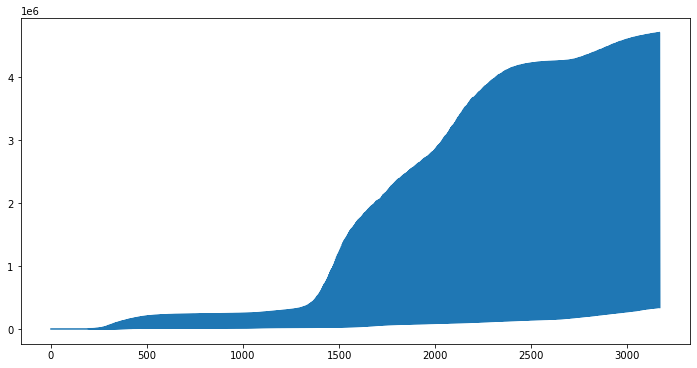

In [70]:
df_trend_infectee["y"].plot(figsize=(12,6))

In [71]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_trend_infectee);

Initial log joint probability = -90.9096
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       3204.82   0.000552868       128.511   6.553e-06       0.001       96  LS failed, Hessian reset 
      99       3205.08   4.58253e-05       69.9833      0.8573      0.8573      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       3205.16   0.000331651       65.2531   4.253e-06       0.001      248  LS failed, Hessian reset 
     199       3205.24   3.49138e-06        70.044      0.3995      0.3995      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       3205.27   0.000179188       72.7676   2.353e-06       0.001      426  LS failed, Hessian reset 
     281       3205.31   1.32795e-05       50.5942   2.262e-07       0.001      546  LS failed, Hessian reset 
     299       3205.31   5.73101e-07       47.5327           1   

In [72]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

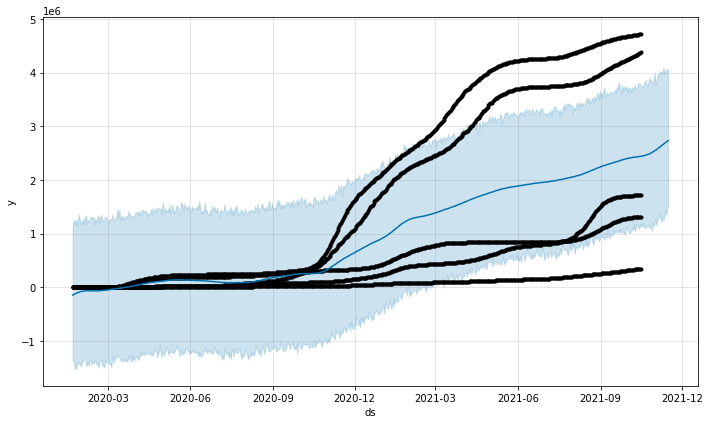

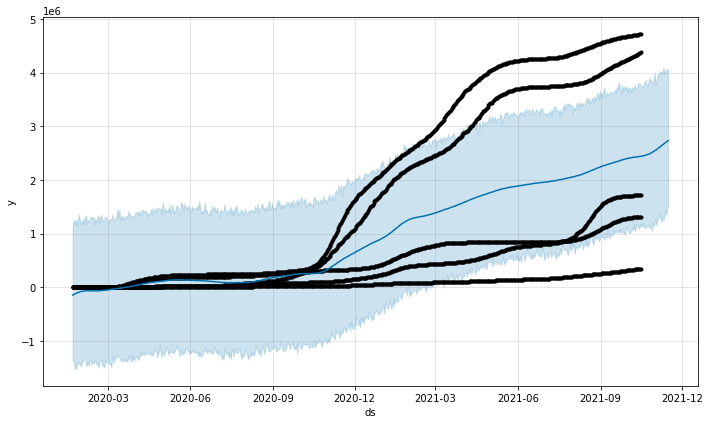

In [73]:
m.plot(forecast)

### 3-2. 각 국가별 데이터 트렌드와 주기정 특성 확인

#### 대한민국

In [74]:
result = df_korea["I/P Rate"]
ds = df_korea["Date"]
df_trend_korea = pd.DataFrame({"ds":ds, "y":result})
df_trend_korea.head()

,ds,y
0,2020-01-22,0.000002
1,2020-01-23,0.000002
2,2020-01-24,0.000004
3,2020-01-25,0.000004
4,2020-01-26,0.000006


<AxesSubplot:>

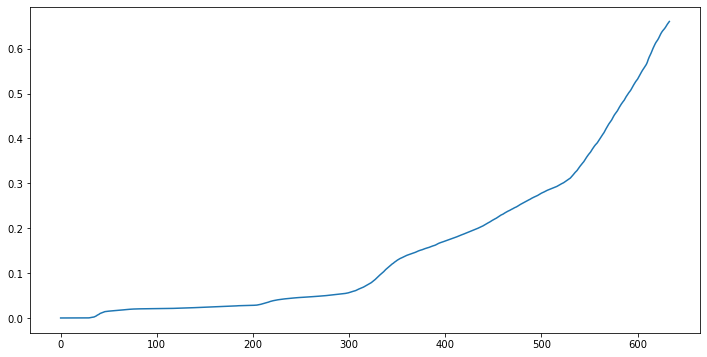

In [75]:
df_trend_korea["y"].plot(figsize=(12,6))

- 5개 국가 모두 300일차에서 400일차 사이에 인구 대비 확진자 그래프의 기울기가 눈에 띄게 커지는 경향을 확인할 수 있습니다.
- 이러한 경향은 전체 데이터가 보여준 경향성과 일치하는 부분이라고 볼 수 있습니다.
- 우리나라의 경우, 최근 데이터에 해당하는 500일차와 600일차 이후의 인구 대비 확진자 그래프의 기울기가 다른 나라에 비해 현저히 가파르게 오르는 것이 특징입니다.

---

#### 일본

In [76]:
result = df_japan["I/P Rate"]
ds = df_japan["Date"]
df_trend_japan = pd.DataFrame({"ds":ds, "y":result})
df_trend_japan.head()

,ds,y
0,2020-01-22,0.000002
1,2020-01-23,0.000002
2,2020-01-24,0.000002
3,2020-01-25,0.000002
4,2020-01-26,0.000003


<AxesSubplot:>

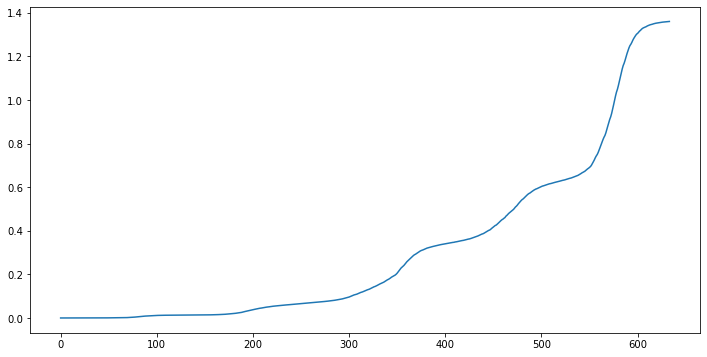

In [77]:
df_trend_japan["y"].plot(figsize=(12,6))

- 5개 국가 모두 300일차에서 400일차 사이에 인구 대비 확진자 그래프의 기울기가 눈에 띄게 커지는 경향을 확인할 수 있습니다.
- 이러한 경향은 전체 데이터가 보여준 경향성과 일치하는 부분이라고 볼 수 있습니다.
- 일본의 경우, 최근 데이터에 해당하는 500일차와 600일차 사이의 인구 대비 확진자 그래프의 기울기가 다른 나라에 비해 급격하게 커졌지만, 최근에 안정세를 회복한 것으로 보이는 점이 특징입니다.

---

#### 이탈리아

In [78]:
result = df_italy["I/P Rate"]
ds = df_italy["Date"]
df_trend_italy = pd.DataFrame({"ds":ds, "y":result})
df_trend_italy.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


<AxesSubplot:>

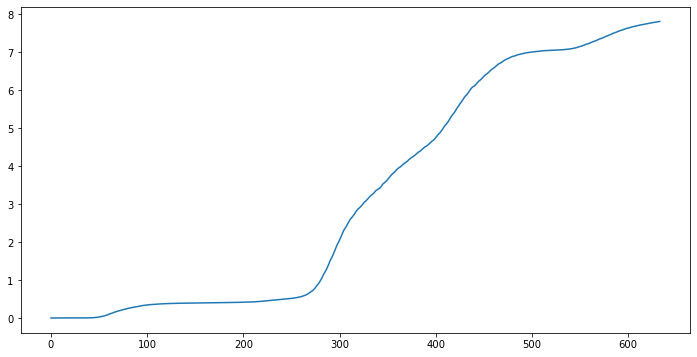

In [79]:
df_trend_italy["y"].plot(figsize=(12,6))

- 5개 국가 모두 300일차에서 400일차 사이에 인구 대비 확진자 그래프의 기울기가 눈에 띄게 커지는 경향을 확인할 수 있습니다.
- 이러한 경향은 전체 데이터가 보여준 경향성과 일치하는 부분이라고 볼 수 있습니다.
- 이탈리아의 경우, 300일차 시점부터 인구 대비 확진자 그래프의 기울기가 급격하게 오르다가, 500일차 이후 완만해진 것이 특징입니다.

---

#### 이스라엘

In [80]:
result = df_israel["I/P Rate"]
ds = df_israel["Date"]
df_trend_israel = pd.DataFrame({"ds":ds, "y":result})
df_trend_israel.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


<AxesSubplot:>

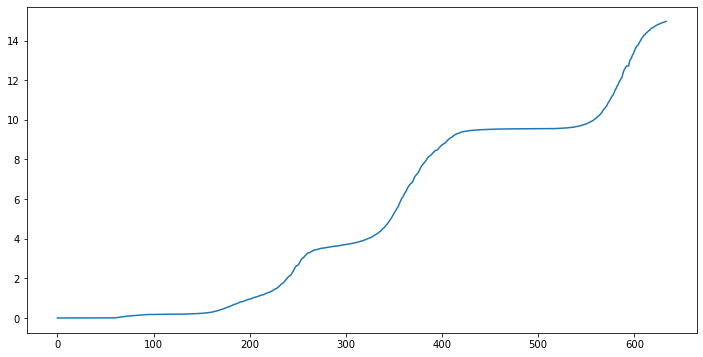

In [81]:
df_trend_israel["y"].plot(figsize=(12,6))

- 5개 국가 모두 300일차에서 400일차 사이에 인구 대비 확진자 그래프의 기울기가 눈에 띄게 커지는 경향을 확인할 수 있습니다.
- 이러한 경향은 전체 데이터가 보여준 경향성과 일치하는 부분이라고 볼 수 있습니다.
- 이스라엘의 경우, 300일차와 400일차 사이에 인구 대비 확진자 그래프의 기울기가 급격하게 커졌지만 400일과 500일차 사이에는 기울기가 0에 가까울 정도로 안정을 회복했다가, 최근들어 다시 급격하게 기울기가 커지고 있습니다.

---

#### 독일

In [82]:
result = df_germany["I/P Rate"]
ds = df_germany["Date"]
df_trend_germany = pd.DataFrame({"ds":ds, "y":result})
df_trend_germany.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


<AxesSubplot:>

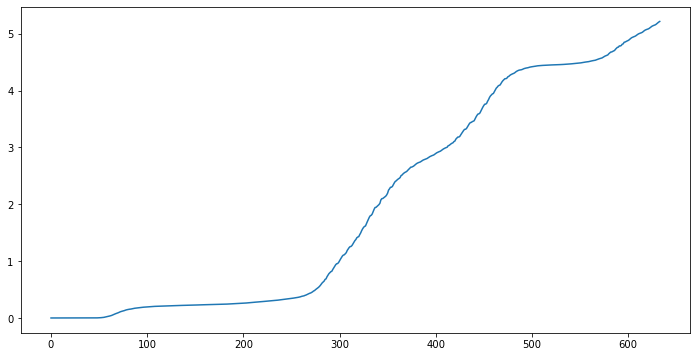

In [83]:
df_trend_germany["y"].plot(figsize=(12,6))

- 5개 국가 모두 300일차에서 400일차 사이에 인구 대비 확진자 그래프의 기울기가 눈에 띄게 커지는 경향을 확인할 수 있습니다.
- 이러한 경향은 전체 데이터가 보여준 경향성과 일치하는 부분이라고 볼 수 있습니다.
- 독일의 경우, 300일차 이후 지금까지 인구 대비 확진자 그래프의 기울기가 비슷한 상태를 유지하는 경향성을 가진 것이 특징입니다.

---

## 4. [ 문제 6번 ] 우리나라의 코로나 대응 현황 분석

- 지금까지 우리나라와 일본, 이탈리아, 이스라엘, 독일의 코로나 확진자 수와 사망자 및 회복자 수를 바탕으로 데이터 분석을 진행해왔습니다.
- 저는 질병에 있어서 정부가 제대로 대응하고 있는지를 확인할 수 있는 지표를 아래의 두 가지 사항으로 정했습니다.
    - 확진자 수의 증감 현황
    - 확진자 대비 사망자 수의 비율

In [84]:
fig = px.line(df_korea, x="Date", y=["Infectee", "Death", "Recover"], color='variable', title="Infectee/Death Cases of Korea") 
fig.show()

In [85]:
fig = px.line(df_korea, x="Date", y="Morality", title="Morality Rate of Korea") 
fig.show()

- 위 그래프를 보았을 때, 확진자 숫자는 시간이 흐를 수록 점점 빠른 속도로 늘고 있는 것이 보입니다.
- 하지만 이러한 경향성은 우리나라 뿐만 아니라 다른 나라의 그래프에서도 확인할 수 있으며, 오히려 확진자 수는 다른 나라에 비하여 적은 모습을 보여주고 있습니다.
- 확진자 대비 사망률을 보더라도, 2020년 4월에서 7월 사이에 2.5% 가까운 사망률을 기록했으나, 시간이 지날 수록 그 비율이 줄어드는 경향을 보이고 있습니다.
- 사망률이 가장 높았던 2020년 5월 경의 사망률은 약 2.5%였는데, 이 수치는 이스라엘을 제외한 다른 3개국의 사망률보다 현저히 낮은 숫자입니다.
- 따라서, 우리나라 정부의 코로나 대응은 비교적 효과적이었다고 평가할 수 있습니다.

## 5. [ 문제 7번 ] 국가의 의료수준 평가하기

- 데이터 출처 : https://www.oecd.org/health/health-data.htm
- 2011년부터 2019년 사이의 모든 원인에 의한 인구 10만명 당 사망률 통계(한국,일본,이탈리아,이스라엘,독일)

In [86]:
df_health = pd.read_csv("../data/HEALTH_STAT_13102021111100088.csv")
df_health.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,DEU,Germany,2011,2011,786.8,NaN,NaN
1,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,DEU,Germany,2012,2012,784.8,NaN,NaN
2,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,DEU,Germany,2013,2013,813.9,NaN,NaN
3,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,DEU,Germany,2014,2014,773.3,NaN,NaN
4,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,DEU,Germany,2015,2015,803.4,NaN,NaN


In [87]:
condition1 = df_health["Country"] == "Korea"
condition2 = df_health["Variable"] == "All causes of death"
condition3 = df_health["Year"] == 2019
df_health[condition1 & condition2 & condition3]

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
1160,CICDALLC,All causes of death,TXCMILTX,Deaths per 100 000 population (standardised ra...,KOR,Korea,2019,2019,595.1,NaN,NaN
3224,CICDALLC,All causes of death,TXCMFETF,Deaths per 100 000 females (standardised rates),KOR,Korea,2019,2019,452.1,NaN,NaN
5281,CICDALLC,All causes of death,TXCMHOTH,Deaths per 100 000 males (standardised rates),KOR,Korea,2019,2019,796.7,NaN,NaN
7362,CICDALLC,All causes of death,NBFEMEPF,Number of female deaths,KOR,Korea,2019,2019,134788.0,NaN,NaN
9419,CICDALLC,All causes of death,NBMALEPH,Number of male deaths,KOR,Korea,2019,2019,160322.0,NaN,NaN
11404,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,KOR,Korea,2019,2019,295110.0,NaN,NaN
13559,CICDALLC,All causes of death,TXCRUDTH,Deaths per 100 000 males (crude rates),KOR,Korea,2019,2019,618.7,NaN,NaN
14061,CICDALLC,All causes of death,TXCRUDTX,Deaths per 100 000 population (crude rates),KOR,Korea,2019,2019,570.7,NaN,NaN
17782,CICDALLC,All causes of death,TXCRUDTF,Deaths per 100 000 females (crude rates),KOR,Korea,2019,2019,522.5,NaN,NaN


In [93]:
df_korea["Morality"].mean()

1.513886358715889

In [94]:
df_korea["Morality"].tail(100).mean()

0.9390437870866362

- 우리나라의 경우, 2019년 기준 모든 질병적 원인에 의한 인구 10만명 당 사망률은 595.1명이었습니다.
- 저는 위의 숫자를 활용하여 다음과 같은 산식을 통해 우리나라의 의료시스템을 객관적인 점수로 수치화 수 있다고 판단했습니다.
    - 100 - (인구 10만명 당 사망률) * 100
- 그 결과 99.40점이 나왔습니다.
- 즉, 우리나라에서 어떤 질병에 의한 사망률이 0.6%를 초과하면 기대에 미치지 못한 것이라고 판단할 수 있습니다.
- 코로나 확진자 대비 사망률이 최근 0.77%에 이르는 것을 고려했을 때, 최근 우리나라의 코로나 대응은 기대에 미치지 못한다고 볼 수 있습니다. 